# MSDS 7331 - Data Mining

# Mini-Project: SVM&LR Classification

by: Evangelos Giakoumakis

### SVM and Logistic Regression Modeling

Before attempting to perform Logistic Regression (LR) and Support Vector Machinesn(SVM) we must first import required libraries as well as dataset. Then verify correct import and get basic dataset information.

In [55]:
# load libraries
import pandas as pd
import numpy as np
    
#load the dataset
df = pd.read_csv('data/ks-projects-201612-cleaned.csv',  sep = ',')  

# display general info of dataset 
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319556 entries, 0 to 319555
Data columns (total 12 columns):
uniqueId          319556 non-null int64
name              319554 non-null object
category          319556 non-null object
main_category     319556 non-null object
currency          319556 non-null object
deadline          319556 non-null object
goal              319556 non-null float64
launched          319556 non-null object
pledged           319556 non-null float64
state             319556 non-null object
backers           319556 non-null int64
country           319556 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 29.3+ MB


,uniqueId,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
0,5971,An American Apocalypse: The Reckoning,Comics,Comics,USD,8/6/2012 20:00,48000.0,6/8/2012 18:46,376.0,failed,7,US
1,18520,Grandma's are Life,World Music,Music,USD,11/18/2016 15:32,15000.0,10/19/2016 15:32,62.0,failed,4,US
2,21109,Meta,Performance Art,Art,GBP,5/6/2015 23:00,150.0,4/8/2015 0:37,173.0,successful,11,GB
3,21371,Water Powered Car,Technology,Technology,USD,8/10/2016 19:02,75000.0,7/26/2016 19:02,120.0,failed,4,US
4,24380,Puss N' Books: A relaxing cat cafe and bookstore.,Spaces,Food,USD,11/26/2015 17:25,20000.0,10/27/2015 16:25,776.0,failed,18,US


In the following section we attempt to shape data in an appropriate format for us to run SVM and LR.

In [56]:
# create state boolean for svm 
df['bl_states'] = df['state ']
df['bl_states'] = df['bl_states'].replace(to_replace='failed',value=False)
df['bl_states'] = df['bl_states'].replace(to_replace='canceled',value=False)
df['bl_states'] = df['bl_states'].replace(to_replace='suspended',value=False)
df['bl_states'] = df['bl_states'].replace(to_replace='successful',value=True)
df['bl_states'] = df['bl_states'].replace(to_replace='live',value=True)

# create currency numerical categories for svm 
df['num_currency'] = df['currency ']
df['num_currency'] = df['num_currency'].replace(to_replace='USD',value=1)
df['num_currency'] = df['num_currency'].replace(to_replace='GBP',value=2)
df['num_currency'] = df['num_currency'].replace(to_replace='EUR',value=3)
df['num_currency'] = df['num_currency'].replace(to_replace='CAD',value=4)
df['num_currency'] = df['num_currency'].replace(to_replace='AUD',value=5)
df['num_currency'] = df['num_currency'].replace(to_replace='CHF',value=6)
df['num_currency'] = df['num_currency'].replace(to_replace='DKK',value=7)
df['num_currency'] = df['num_currency'].replace(to_replace='HKD',value=8)
df['num_currency'] = df['num_currency'].replace(to_replace='MXN',value=9)
df['num_currency'] = df['num_currency'].replace(to_replace='NOK',value=10)
df['num_currency'] = df['num_currency'].replace(to_replace='NZD',value=11)
df['num_currency'] = df['num_currency'].replace(to_replace='SEK',value=12)
df['num_currency'] = df['num_currency'].replace(to_replace='SGD',value=13)

# create main_category numerical categories for svm 
df['num_category'] = df['main_category ']
df['num_category'] = df['num_category'].replace(to_replace='Art',value=1)
df['num_category'] = df['num_category'].replace(to_replace='Comics',value=2)
df['num_category'] = df['num_category'].replace(to_replace='Crafts',value=3)
df['num_category'] = df['num_category'].replace(to_replace='Dance',value=4)
df['num_category'] = df['num_category'].replace(to_replace='Design',value=5)
df['num_category'] = df['num_category'].replace(to_replace='Fashion',value=6)
df['num_category'] = df['num_category'].replace(to_replace='Film & Video',value=7)
df['num_category'] = df['num_category'].replace(to_replace='Food',value=8)
df['num_category'] = df['num_category'].replace(to_replace='Games',value=9)
df['num_category'] = df['num_category'].replace(to_replace='Journalism',value=10)
df['num_category'] = df['num_category'].replace(to_replace='Music',value=11)
df['num_category'] = df['num_category'].replace(to_replace='Photography',value=12)
df['num_category'] = df['num_category'].replace(to_replace='Publishing',value=13)
df['num_category'] = df['num_category'].replace(to_replace='Technology',value=14)
df['num_category'] = df['num_category'].replace(to_replace='Theater',value=15)

# create countries numerical categories for svm 
df['num_country'] = df['country ']
df['num_country'] = df['num_country'].replace(to_replace='US',value=1)
df['num_country'] = df['num_country'].replace(to_replace='GB',value=2)
df['num_country'] = df['num_country'].replace(to_replace='CA',value=3)
df['num_country'] = df['num_country'].replace(to_replace='AU',value=4)
df['num_country'] = df['num_country'].replace(to_replace='NL',value=5)
df['num_country'] = df['num_country'].replace(to_replace='AT',value=6)
df['num_country'] = df['num_country'].replace(to_replace='BE',value=7)
df['num_country'] = df['num_country'].replace(to_replace='CH',value=8)
df['num_country'] = df['num_country'].replace(to_replace='DE',value=9)
df['num_country'] = df['num_country'].replace(to_replace='DK',value=10)
df['num_country'] = df['num_country'].replace(to_replace='ES',value=11)
df['num_country'] = df['num_country'].replace(to_replace='FR',value=12)
df['num_country'] = df['num_country'].replace(to_replace='HK',value=13)
df['num_country'] = df['num_country'].replace(to_replace='IE',value=14)
df['num_country'] = df['num_country'].replace(to_replace='IT',value=15)
df['num_country'] = df['num_country'].replace(to_replace='LU',value=16)
df['num_country'] = df['num_country'].replace(to_replace='MX',value=17)
df['num_country'] = df['num_country'].replace(to_replace='N,"0',value=18)
df['num_country'] = df['num_country'].replace(to_replace='NL',value=19)
df['num_country'] = df['num_country'].replace(to_replace='NO',value=18)
df['num_country'] = df['num_country'].replace(to_replace='NZ',value=20)
df['num_country'] = df['num_country'].replace(to_replace='SE',value=21)
df['num_country'] = df['num_country'].replace(to_replace='SG',value=22)


df['IsUSD'] = df['currency ']=='USD'
df.IsUSD = df.IsUSD.astype(np.int)

df['IsGBP'] = df['currency ']=='GBP'
df.IsGBP = df.IsGBP.astype(np.int)

df['IsEUR'] = df['currency ']=='EUR'
df.IsEUR = df.IsEUR.astype(np.int)

df['IsCAD'] = df['currency ']=='CAD'
df.IsCAD = df.IsCAD.astype(np.int)

df['IsUS'] = df['country ']=='US'
df.IsUS = df.IsUS.astype(np.int)

df['IsGB'] = df['country ']=='GB'
df.IsGB = df.IsGB.astype(np.int)

df['IsCA'] = df['country ']=='CA'
df.IsCA = df.IsCA.astype(np.int)

df['IsAU'] = df['country ']=='AU'
df.IsAU = df.IsAU.astype(np.int)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319556 entries, 0 to 319555
Data columns (total 24 columns):
uniqueId          319556 non-null int64
name              319554 non-null object
category          319556 non-null object
main_category     319556 non-null object
currency          319556 non-null object
deadline          319556 non-null object
goal              319556 non-null float64
launched          319556 non-null object
pledged           319556 non-null float64
state             319556 non-null object
backers           319556 non-null int64
country           319556 non-null object
bl_states         319556 non-null bool
num_currency      319556 non-null int64
num_category      319556 non-null int64
num_country       319556 non-null int64
IsUSD             319556 non-null int64
IsGBP             319556 non-null int64
IsEUR             319556 non-null int64
IsCAD             319556 non-null int64
IsUS              319556 non-null int64
IsGB              319556 non-null int6

,uniqueId,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,num_category,num_country,IsUSD,IsGBP,IsEUR,IsCAD,IsUS,IsGB,IsCA,IsAU
0,5971,An American Apocalypse: The Reckoning,Comics,Comics,USD,8/6/2012 20:00,48000.0,6/8/2012 18:46,376.0,failed,...,2,1,1,0,0,0,1,0,0,0
1,18520,Grandma's are Life,World Music,Music,USD,11/18/2016 15:32,15000.0,10/19/2016 15:32,62.0,failed,...,11,1,1,0,0,0,1,0,0,0
2,21109,Meta,Performance Art,Art,GBP,5/6/2015 23:00,150.0,4/8/2015 0:37,173.0,successful,...,1,2,0,1,0,0,0,1,0,0
3,21371,Water Powered Car,Technology,Technology,USD,8/10/2016 19:02,75000.0,7/26/2016 19:02,120.0,failed,...,14,1,1,0,0,0,1,0,0,0
4,24380,Puss N' Books: A relaxing cat cafe and bookstore.,Spaces,Food,USD,11/26/2015 17:25,20000.0,10/27/2015 16:25,776.0,failed,...,8,1,1,0,0,0,1,0,0,0


In [57]:
df['IsArt'] = df['main_category ']=='Art'
df.IsArt = df.IsArt.astype(np.int)

df['IsComics'] = df['main_category ']=='Comics'
df.IsComics = df.IsComics.astype(np.int)

df['IsCrafts'] = df['main_category ']=='Crafts'
df.IsCrafts = df.IsCrafts.astype(np.int)

df['IsDance'] = df['main_category ']=='Dance'
df.IsDance = df.IsDance.astype(np.int)

df['IsDesign'] = df['main_category ']=='Design'
df.IsDesign = df.IsDesign.astype(np.int)

df['IsFashion'] = df['main_category ']=='Fashion'
df.IsFashion = df.IsFashion.astype(np.int)

df['IsFilm'] = df['main_category ']=='Film & Video'
df.IsFilm = df.IsFilm.astype(np.int)

df['IsFood'] = df['main_category ']=='Food'
df.IsFood = df.IsFood.astype(np.int)

df['IsGames'] = df['main_category ']=='Games'
df.IsGames = df.IsGames.astype(np.int)

df['IsJournalism'] = df['main_category ']=='Journalism'
df.IsJournalism = df.IsJournalism.astype(np.int)

df['IsMusic'] = df['main_category ']=='Music'
df.IsMusic = df.IsMusic.astype(np.int)

df['IsPhotography'] = df['main_category ']=='Photography'
df.IsPhotography = df.IsPhotography.astype(np.int)

df['IsPublishing'] = df['main_category ']=='Publishing'
df.IsPublishing = df.IsPublishing.astype(np.int)

df['IsTechnology'] = df['main_category ']=='Technology'
df.IsTechnology = df.IsTechnology.astype(np.int)

df['IsTheater'] = df['main_category ']=='Theater'
df.IsTheater = df.IsTheater.astype(np.int)

In [58]:
# delete unusable variables
del df['state ']
del df['currency ']
del df['main_category ']
del df['category ']
del df['name ']
del df['deadline ']
del df['launched ']
del df['country ']
del df['num_country']
del df['num_currency']
del df['num_category']

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319556 entries, 0 to 319555
Data columns (total 28 columns):
uniqueId         319556 non-null int64
goal             319556 non-null float64
pledged          319556 non-null float64
backers          319556 non-null int64
bl_states        319556 non-null bool
IsUSD            319556 non-null int64
IsGBP            319556 non-null int64
IsEUR            319556 non-null int64
IsCAD            319556 non-null int64
IsUS             319556 non-null int64
IsGB             319556 non-null int64
IsCA             319556 non-null int64
IsAU             319556 non-null int64
IsArt            319556 non-null int64
IsComics         319556 non-null int64
IsCrafts         319556 non-null int64
IsDance          319556 non-null int64
IsDesign         319556 non-null int64
IsFashion        319556 non-null int64
IsFilm           319556 non-null int64
IsFood           319556 non-null int64
IsGames          319556 non-null int64
IsJournalism     319556 non-

,uniqueId,goal,pledged,backers,bl_states,IsUSD,IsGBP,IsEUR,IsCAD,IsUS,...,IsFashion,IsFilm,IsFood,IsGames,IsJournalism,IsMusic,IsPhotography,IsPublishing,IsTechnology,IsTheater
0,5971,48000.0,376.0,7,False,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,18520,15000.0,62.0,4,False,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,21109,150.0,173.0,11,True,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21371,75000.0,120.0,4,False,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,24380,20000.0,776.0,18,False,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


As we can see from code above we had to transform every variable into a numerical or binary represantion since those are the inputs SVM and LR require for proper calculation of models. We created many new variables such as:
bl_states, num_currency, num_category, num_country, IsUSD, IsGBP, IsEUR, IsCAD, IsUS, IsGB, IsCA, IsAU, IsArt, IsComics, IsCrafts, IsDance, IsDesign, IsFashion, IsFilm, IsFood, IsGames, IsJournalism, IsMusic, IsPhotography, IsPublishing, IsTechnology, IsTheater
replacing many categorical that could not be used.

### Split Dataset to Training and Testing

In the section below we split our existing dataset in training and testing  (by eliminating 'bl_states' variable) and spliting 20% test data set and 80% training data set.

In [59]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'bl_states' in df:
    y = df['bl_states'].values # get the labels we want
    del df['bl_states'] # get rid of the class label
    X = df.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 5
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=5, random_state=None, test_size=0.2, train_size=None)


### Logistic Regression

Logistic regression is a predictive analysis that is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. In the following code we iterate through our training and testing datasets and calculate the accuracy of our model.

In [60]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    

('====Iteration', 0, ' ====')
('accuracy', 0.63793966704218297)
('confusion matrix\n', array([[40527,     1],
       [23139,   245]]))
('====Iteration', 1, ' ====')
('accuracy', 0.63462260608336463)
('confusion matrix\n', array([[40370,     3],
       [23349,   190]]))
('====Iteration', 2, ' ====')
('accuracy', 0.63757979722117908)
('confusion matrix\n', array([[40525,     3],
       [23160,   224]]))
('====Iteration', 3, ' ====')
('accuracy', 0.63582738765802982)
('confusion matrix\n', array([[40418,     1],
       [23274,   219]]))
('====Iteration', 4, ' ====')
('accuracy', 0.63384028038553009)
('confusion matrix\n', array([[40302,     1],
       [23401,   208]]))


In [61]:
# adjusting the parameters for logistic regression - class_weight
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight='balanced') # get object

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1


('====Iteration', 0, ' ====')
('accuracy', 0.90716923269495553)
('confusion matrix\n', array([[38251,  2201],
       [ 3732, 19728]]))
('====Iteration', 1, ' ====')
('accuracy', 0.89773438477907119)
('confusion matrix\n', array([[37500,  3106],
       [ 3430, 19876]]))
('====Iteration', 2, ' ====')
('accuracy', 0.90899987482788835)
('confusion matrix\n', array([[38169,  2224],
       [ 3592, 19927]]))
('====Iteration', 3, ' ====')
('accuracy', 0.90757604205782949)
('confusion matrix\n', array([[38134,  2274],
       [ 3633, 19871]]))
('====Iteration', 4, ' ====')
('accuracy', 0.91123732632369503)
('confusion matrix\n', array([[38313,  2169],
       [ 3504, 19926]]))


### Normalized Weights

Weighting is a procedure that weights the data to compensate the differences in sample and population. Normalization is the process of bringing all variables in the same plane so that comparison is easier. In the code below we initially scale our data and then transform it before training in order to calculate our models accuracy.

In [62]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,df.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

('accuracy:', 0.81876642883965456)
[[38687  1795]
 [ 9788 13642]]
('goal ', 'has weight of', -14.538397375257977)
('IsTechnology', 'has weight of', -0.27740679887185637)
('IsGames', 'has weight of', -0.20187766673352911)
('IsUS', 'has weight of', -0.1888953394928965)
('IsGB', 'has weight of', -0.16748913728854592)
('IsDesign', 'has weight of', -0.15429979348238576)
('IsCA', 'has weight of', -0.13638648819450552)
('IsFashion', 'has weight of', -0.093709854451886024)
('IsFood', 'has weight of', -0.08742377168509724)
('IsEUR', 'has weight of', -0.083548503679726216)
('IsAU', 'has weight of', -0.072679262838359182)
('IsJournalism', 'has weight of', -0.033167281652903662)
('IsCrafts', 'has weight of', -0.016687245269798128)
('IsPublishing', 'has weight of', -0.0052831707352589685)
('uniqueId', 'has weight of', -0.00034599292802407522)
('IsPhotography', 'has weight of', 0.0052097666464122087)
('IsCAD', 'has weight of', 0.047266376238748749)
('IsComics', 'has weight of', 0.077435887554385185)

### Plot Results

In the section bellow we plot our variables and their respective weights. As we can see only 3 variables seem to play a major role in predicting. Those are 'goal', 'pledged' and 'backers'. The rest provide very little predictive power.

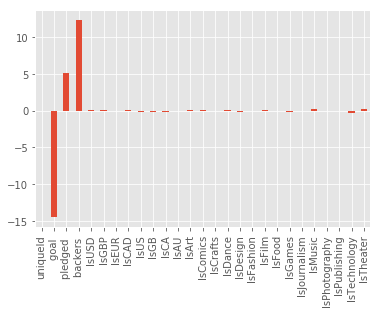

In [63]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=df.columns)
weights.plot(kind='bar')
plt.show()

### SVM

In [64]:
from sklearn.preprocessing import StandardScaler
# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)

from sklearn.pipeline import Pipeline
# you can apply the StandardScaler function inside of the cross-validation loop 
#  but this requires the use of PipeLines in scikit. 
#  A pipeline can apply feature pre-processing and data fitting in one compact notation
#  Here is an example!

std_scl = StandardScaler()
lr_clf = LogisticRegression(penalty='l2', C=0.05) 

# create the pipline
piped_object = Pipeline([('scale', std_scl),  # do this
                         ('logit_model', lr_clf)]) # and then do this

weights = []
# run the pipline cross validated
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    piped_object.fit(X[train_indices],y[train_indices])  # train object
    # it is a little odd getting trained objects from a  pipeline:
    weights.append(piped_object.named_steps['logit_model'].coef_[0])
    

weights = np.array(weights)

In [65]:
# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

In [66]:
#This was an attempt to run standard SVM, but it was incredibly inefficient due to the size of our dataset.
# lets investigate SVMs on the data and play with the parameters and kernels
#from sklearn.svm import SVC

# train the model just as before
#svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
#svm_clf.fit(X_train_scaled, y_train)  # train object

#y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

#acc = mt.accuracy_score(y_test,y_hat)
#conf = mt.confusion_matrix(y_test,y_hat)
#print('accuracy:', acc )
#print(conf)

Due to the size of our dataset (roughly 320,000 records), the standard SVM model takes far too long to train (we gave up after 10 minutes). Therefore, we need to use stochastic gradient descent. 

### SVM with Stochastic Gradient Descent

In [67]:
# now divide the data into test and train using scikit learn built-ins
from sklearn.model_selection import StratifiedShuffleSplit 

cv = StratifiedShuffleSplit( n_splits=1,test_size=0.2)

In [68]:
%%time
# use some compact notation for creating a linear SVM classifier with stochastic descent
from sklearn.linear_model import SGDClassifier

regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=-1, penalty='l2')

scl = StandardScaler()
for train_idx, test_idx in cv.split(X,y):
    svm_sgd.fit(scl.fit_transform(X[train_idx]),y[train_idx])
    yhat = svm_sgd.predict(scl.transform(X[test_idx]))
    
    conf = mt.confusion_matrix(y[test_idx],yhat)
    acc = mt.accuracy_score(y[test_idx],yhat)

print('SVM:', acc)

('SVM:', 0.65397734384779072)
CPU times: user 800 ms, sys: 40 ms, total: 840 ms
Wall time: 816 ms


In [69]:
%%time
# changing parameter alpha for linear SVM classifier with stochastic descent
from sklearn.linear_model import SGDClassifier

regularize_const = 0.05
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=-1, penalty='l2')

scl = StandardScaler()
for train_idx, test_idx in cv.split(X,y):
    svm_sgd.fit(scl.fit_transform(X[train_idx]),y[train_idx])
    yhat = svm_sgd.predict(scl.transform(X[test_idx]))
    
    conf = mt.confusion_matrix(y[test_idx],yhat)
    acc = mt.accuracy_score(y[test_idx],yhat)

print('SVM:', acc)

('SVM:', 0.66508636875704097)
CPU times: user 780 ms, sys: 80 ms, total: 860 ms
Wall time: 702 ms


In [70]:
%%time
# use some compact notation for creating a logistic regression classifier with stochastic descent
log_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', max_iter=iterations, n_jobs=-1, penalty='l2')

scl = StandardScaler()
for train_idx, test_idx in cv.split(X,y):
    log_sgd.fit(scl.fit_transform(X[train_idx]),y[train_idx])
    yhat = log_sgd.predict(scl.transform(X[test_idx]))
    
    conf = mt.confusion_matrix(y[test_idx],yhat)
    acc = mt.accuracy_score(y[test_idx],yhat)

print('Logistic Regression:', acc)

('Logistic Regression:', 0.67719677055951932)
CPU times: user 900 ms, sys: 60 ms, total: 960 ms
Wall time: 813 ms


In [71]:
%%time
# changing parameter alpha for logistic regression classifier with stochastic descent
log_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', max_iter=iterations, n_jobs=-1, penalty='l2')

scl = StandardScaler()
for train_idx, test_idx in cv.split(X,y):
    log_sgd.fit(scl.fit_transform(X[train_idx]),y[train_idx])
    yhat = log_sgd.predict(scl.transform(X[test_idx]))
    
    conf = mt.confusion_matrix(y[test_idx],yhat)
    acc = mt.accuracy_score(y[test_idx],yhat)

print('Logistic Regression:', acc)

('Logistic Regression:', 0.68439416697959699)
CPU times: user 910 ms, sys: 60 ms, total: 970 ms
Wall time: 814 ms


### Model Advantages

Logistic Regression:
This model resulted in an accuracy of about 0.635 +/- 0.005. This was the worst accuracy value out of all of the models. Furthermore, it was slightly slower than the fastest model though the difference wasn't large enough to make a practical difference with a dataset of our size. However, when we change the class_weight parameter to 'balanced', it drastically improves the accuracy to about 0.910 +/- 0.0005. 

Logistic Regression with Normalized Weights:
This model resulted in an accuracy of about 0.820 +/- 0.005. Out of all our models (excluding standard SVM) this one took the most time for training. However, the resulting accuracy was far better than most other models, making the time increase of roughly 2 seconds worth the trade-off. 

SVM:
Due to the size of our dataset (about 320,000 records), standard SVM was incredibly inefficient. We tried running and waited 10 minutes for no results.

Linear SVM Classifier with Stochastic Gradient Descent:
This model resulted in an accuracy of about 0.655 +/- 0.005. However, when we changed the alpha parameter from 0.1 to 0.05, the model's accuracy increased to about 0.665 +/- 0.005. This was the quickest for training the model.

Logistic SVM Classifier with Stochastic Gradient Descent:
This model resulted in an accuracy of about 0.660 +/- 0.005. However, when we changed the alpha parameter from 0.1 to 0.05, the model's accuracy increased to about 0.680 +/- 0.005. While this method was slightly slower than linear SVM classifier, the value is so small (less than a second) that it makes no practical difference (at least with a dataset of our size).

### Weighted Interpretation

In [72]:
# reprint the normalized weights from logistic regression
zip_vars = zip(lr_clf.coef_.T,df.columns) 
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) 

('goal ', 'has weight of', -14.388256757167852)
('IsTechnology', 'has weight of', -0.28040475796654102)
('IsUS', 'has weight of', -0.2606927428415633)
('IsGames', 'has weight of', -0.20645058742669573)
('IsGB', 'has weight of', -0.17118977925472131)
('IsCA', 'has weight of', -0.15970293067683441)
('IsDesign', 'has weight of', -0.14506269713118713)
('IsFashion', 'has weight of', -0.092257382488451903)
('IsFood', 'has weight of', -0.089400204244454634)
('IsEUR', 'has weight of', -0.086701443527011243)
('IsAU', 'has weight of', -0.067041119208671868)
('IsJournalism', 'has weight of', -0.032728258921757382)
('IsCrafts', 'has weight of', -0.019174585585831579)
('IsPublishing', 'has weight of', -0.0031504748660004622)
('uniqueId', 'has weight of', -0.0019041660987810097)
('IsPhotography', 'has weight of', 0.0021122860517103826)
('IsCAD', 'has weight of', 0.071947329959808376)
('IsComics', 'has weight of', 0.076045721554199711)
('IsFilm', 'has weight of', 0.10507516103995233)
('IsGBP', 'has w

Note: UniqueID is simply an identifier variable. The groups is'country' and is'currency' practically measure the same thing and have the same interpretation so we will just look at is'country'. Therefore, for this analysis we will not look at the variables uniqueID and the Is'currency' group.

Based on the weights from the above table, it is clear that the three variables that contribute the most to the model are goal, backers, and pledged. The variable groups Is'category' and Is'country' are not nearly as significant. Ultimately, the three variables with the most extreme weight values provide the most predictive power to the model. This also makes logical sense as the success of a Kickstarter project depends on the money raised. This is reflected in the top three variables. Goal looks at how much money an individual wants to raise where a higher goal reduces the odds of success as they need more money to succeed. Backers is a loose metric for how much money is coming in as more backers generally means more money going to the project. Pledged is a direct measurement of how much money is coming in. 

The Is'country' group of variables seems to account for cultural/language differences in raising money or how prevalent Kickstarter is in different countries. The weights for these variables are relatively small meaning that they don't have a lot of explanatory power in the model. However, it is interesting to note that the variable IsUS has the biggest weight of the Is'country' group. While this is merely conjecture, Kickstarter could be more prevalent in the United States (Kickstarter is an American company). It could also show that a project raises more money if it is in English since other English-majority countries seem to be weighted more. 

The Is'category' variable refers to different categories that a project can fall into. The low weight for this variable implies that categories do not have much predictive power in this model. Of particular interst are the variables IsTechnology and IsGames which have the largest negative weights within the group as well as the variables IsMusic and IsTheater which have the largest positive weights within the group. This means that projects in the Technology or Games categories are less likely to succeed while the projects in the Music or Theater categories are more likely to succeed. 

### Sub-sampling Data

In this section we will sample a small part of our dataset and then run Stochastic Gradient Descent in order to see if that will improve our accuracy and/or efficiency. We deciced to use a subsample of 20,000 randomly chosen entries.

In [73]:
df_sample = df.sample(n=20000)
df_sample.head()

,uniqueId,goal,pledged,backers,IsUSD,IsGBP,IsEUR,IsCAD,IsUS,IsGB,...,IsFashion,IsFilm,IsFood,IsGames,IsJournalism,IsMusic,IsPhotography,IsPublishing,IsTechnology,IsTheater
315937,2123078331,3000.0,3423.0,89,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
69197,466270836,5000.0,114.0,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
239449,1609627253,900.0,1136.0,23,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
233954,1572893880,150000.0,812.0,31,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
218327,1468102019,75000.0,436.0,8,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [74]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'bl_states' in df_sample:
    y_sam = df_sample['bl_states'].values # get the labels we want
    del df_sample['bl_states'] # get rid of the class label
    X_sam = df_sample.values # use everything else to predict!

num_cv_iterations = 5
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=5, random_state=None, test_size=0.2, train_size=None)


In [75]:
# now divide the data into test and train using scikit learn built-ins
from sklearn.model_selection import StratifiedShuffleSplit 

cv = StratifiedShuffleSplit( n_splits=1,test_size=0.2)

In [76]:
%%time
# use some compact notation for creating a linear SVM classifier with stochastic descent
from sklearn.linear_model import SGDClassifier

regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=-1, penalty='l2')

scl = StandardScaler()
for train_idx, test_idx in cv.split(X,y):
    svm_sgd.fit(scl.fit_transform(X[train_idx]),y[train_idx])
    yhat = svm_sgd.predict(scl.transform(X[test_idx]))
    
    conf = mt.confusion_matrix(y[test_idx],yhat)
    acc = mt.accuracy_score(y[test_idx],yhat)

print('SVM:', acc)

('SVM:', 0.65336712980347977)
CPU times: user 630 ms, sys: 80 ms, total: 710 ms
Wall time: 696 ms


In [1]:
f = plt.figure(figsize=(8,8))
plt.imshow(conf)

NameError: name 'plt' is not defined

As we can see from the results above subsampling really helped us increase efficiency of our model (by reducing computation time) while giving us the same accuracy. 